# News Headline Analysis using  Recurrent Neural Network

### Firstly, I will train my model using LSTM 
### And after that, i will be using Bidirectional LSTM

---

In [2]:
import pandas as pd
import numpy as np

In [6]:
# Reading the dataset from kaggle
df = pd.read_csv('News Headline traindata.csv')

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


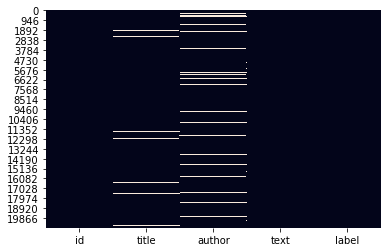

In [9]:
# to drop nan values
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df = df.dropna()

In [11]:
# Independent features
X=df.drop('label',axis=1)

In [12]:
# Dependent Features
y=df['label']

In [13]:
X.shape

(18285, 4)

In [14]:
y.shape

(18285,)

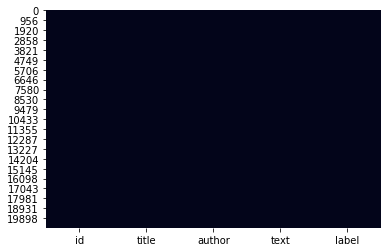

In [15]:
sns.heatmap(df.isnull(), cbar=False)

So now, we have dropped all tha null values !

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

### Making a copy of Independent Features

In [20]:
messages = X.copy()

In [23]:
messages['title'][2]

'Why the Truth Might Get You Fired'

In [24]:
messages.reset_index(inplace=True)

### Removing Stopwords

In [25]:
import nltk
import re
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91993\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Stemming

In [28]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []

for i in range(0, len(messages)):
    
    # Replacing characters other than alphabets with a space :
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [29]:
print(i)

18284


In [31]:
#corpus

## One Hot Encoding

In [32]:
voc_size = 5000

In [34]:
onehot_rep=[one_hot(words,voc_size)for words in corpus] 

In [37]:
onehot_rep

[[581, 4213, 1897, 2334, 806, 2197, 2925, 1276, 981, 4840],
 [2910, 3632, 358, 261, 4193, 39, 1352],
 [510, 3646, 3757, 3307],
 [1595, 4146, 1729, 4354, 2617, 996],
 [1639, 4193, 97, 1422, 3978, 4852, 4193, 765, 3678, 2001],
 [1928,
  2647,
  1018,
  424,
  1846,
  3800,
  4243,
  3978,
  557,
  2176,
  2860,
  1317,
  1267,
  198,
  1352],
 [1832, 37, 1438, 1076, 1238, 248, 3475, 1907, 3668, 4298, 4690],
 [3342, 4101, 1878, 1432, 1266, 870, 3800, 4426, 3668, 4298, 4690],
 [1864, 3903, 1604, 505, 569, 1028, 3631, 480, 3800, 4752],
 [3022, 763, 248, 1297, 1429, 4114, 3985, 4895],
 [3936, 3683, 4107, 53, 3063, 3642, 1713, 1132, 1889, 4740, 3838],
 [4354, 2831, 806, 1028, 3800, 1266],
 [1433, 4759, 1398, 857, 2622, 2363, 2825, 3852, 2094],
 [433, 1193, 2909, 615, 1725, 691, 4423, 3668, 4298, 4690],
 [2068, 4892, 4118, 2325, 4075, 3668, 4298, 4690],
 [3877, 1122, 4310, 4895, 3597, 1910, 3762, 3163, 4298, 366],
 [2934, 4509, 3632],
 [50, 91, 2515, 4689, 3800, 2213, 469, 1352],
 [732, 1275, 

## Embedding Representation

In [39]:
sent_length=20
# adding padding to make all sentences of same length.
embedding=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)

In [40]:
print(embedding)

[[   0    0    0 ... 1276  981 4840]
 [   0    0    0 ... 4193   39 1352]
 [   0    0    0 ... 3646 3757 3307]
 ...
 [   0    0    0 ... 3668 4298 4690]
 [   0    0    0 ... 1676  777 1546]
 [   0    0    0 ... 4044 3327 3078]]


In [47]:
embedding[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1595, 4146, 1729, 4354, 2617,  996])

---

# Analysis using -- *LSTM*

---

## Creating the Model - LSTM

In [48]:
embedding_vector_features=40

model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))

# Using Sigmoid Activation Function
model.add(Dense(1,activation='sigmoid'))

# Using ADAM Optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
len(embedding),y.shape

(18285, (18285,))

### Train Test Split

In [52]:
X_final=np.array(embedding)
y_final=np.array(y)

In [53]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

## Training the Model - LSTM

In [55]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 4s 21ms/step - loss: 0.3385 - accuracy: 0.8386 - val_loss: 0.2010 - val_accuracy: 0.9138
Epoch 2/10
192/192 [==============================] - 3s 17ms/step - loss: 0.1416 - accuracy: 0.9443 - val_loss: 0.2177 - val_accuracy: 0.9200
Epoch 3/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0928 - accuracy: 0.9667 - val_loss: 0.2402 - val_accuracy: 0.9233
Epoch 4/10
192/192 [==============================] - 3s 18ms/step - loss: 0.0627 - accuracy: 0.9793 - val_loss: 0.2797 - val_accuracy: 0.9110
Epoch 5/10
192/192 [==============================] - 3s 18ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.3133 - val_accuracy: 0.9046
Epoch 6/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.3433 - val_accuracy: 0.9082
Epoch 7/10
192/192 [==============================] - 4s 21ms/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.4315 - val_accuracy: 0.9148

LSTM Model Trained.

## Predicting...

In [56]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


### Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test,y_pred)

array([[3124,  295],
       [ 257, 2359]], dtype=int64)

### Accuracy

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,y_pred)

0.9085335542667772

### Classification Report

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3419
           1       0.89      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [86]:
#Now,

***
***

# Analysis using --  *Bidirectional LSTM*

---

In [64]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [66]:
from tensorflow.keras.layers import Bidirectional

In [67]:
print(i)

18284


In [68]:
#corpus

In [69]:
embedding[4]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1639,
       4193,   97, 1422, 3978, 4852, 4193,  765, 3678, 2001])

## Creating the Model - Bidirectional LSTM

In [91]:

embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model2.add(Bidirectional(LSTM(100)))

# Using Sigmoid Activation Function
model2.add(Dense(1,activation='sigmoid'))

# Using ADAM Optimizer
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               112800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

## Training the Model - Bidirectional LSTM

In [93]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 11s 60ms/step - loss: 0.2989 - accuracy: 0.8602 - val_loss: 0.2047 - val_accuracy: 0.9145
Epoch 2/10
192/192 [==============================] - 9s 46ms/step - loss: 0.1382 - accuracy: 0.9444 - val_loss: 0.2083 - val_accuracy: 0.9135
Epoch 3/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0874 - accuracy: 0.9675 - val_loss: 0.2526 - val_accuracy: 0.9157
Epoch 4/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0530 - accuracy: 0.9826 - val_loss: 0.3199 - val_accuracy: 0.9122
Epoch 5/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.3731 - val_accuracy: 0.9132
Epoch 6/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.4090 - val_accuracy: 0.9052
Epoch 7/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.5271 - val_accuracy: 0.903

Bidirectional LSTM Model Trained

## Predicting ..

In [94]:
y_pred2=model2.predict_classes(X_test)

### Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_test,y_pred2)

array([[3145,  274],
       [ 300, 2316]], dtype=int64)

### Accuracy

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_test,y_pred2)

0.9048881524440763

### Classification Report

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3419
           1       0.89      0.89      0.89      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



# *Concluding --*

From the two above observations, we can say that :

Over boththe Recurrent Neural Network Model :

LSTM model performed slightly better in comparision to the Bidirectional_LSTM model !